# SpaCy NLP Tools Implementation

This notebook demonstrates the implementation of 8 essential NLP processing tools using SpaCy:

1. **Sentence Splitter** - Splits text into individual sentences
2. **Tokenization** - Breaks text into individual tokens (words, punctuation)
3. **Stemming** - Reduces words to their root form
4. **Lemmatization** - Reduces words to their canonical/dictionary form
5. **Entity Masking** - Identifies and masks named entities
6. **POS Tagger** - Identifies parts of speech for each token
7. **Phrase Chunking** - Groups tokens into meaningful phrases
8. **Syntactic Parser** - Analyzes grammatical structure and dependencies

In [14]:
# Import required libraries
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from spacy import displacy
from spacy.lang.en.stop_words import STOP_WORDS
from typing import List, Dict
from spacy.language import Language


# Load the English language model
nlp = spacy.load('en_core_web_sm')

print(f"SpaCy version: {spacy.__version__}")
print(f"Model loaded: {nlp.meta['name']} v{nlp.meta['version']}")

SpaCy version: 3.8.7
Model loaded: core_web_sm v3.8.0


## Sample Research Paper Abstract

In [15]:
# Research paper abstract - "Attention Is All You Need" by Vaswani et al.
abstract = """
The dominant sequence transduction models are based on complex recurrent or convolutional neural networks 
that include an encoder and a decoder. The best performing models also connect the encoder and decoder 
through an attention mechanism. We propose a new simple network architecture, the Transformer, based 
solely on attention mechanisms, dispensing with recurrence and convolution entirely. Experiments on two 
machine translation tasks show that these models are superior in quality while being more parallelizable 
and requiring significantly less time to train. Our model achieves 28.4 BLEU on the WMT 2014 
English-to-German translation task, improving over the existing best results by over 2 BLEU points. 
On the WMT 2014 English-to-French translation task, our model establishes a new state-of-the-art 
BLEU score of 41.8 after training for 3.5 days on eight P100 GPUs, a small fraction of the training 
costs of the best models described in the literature.
""".strip()

print("Research Paper Abstract:")
print("=" * 50)
print(abstract)
print("\nText length:", len(abstract), "characters")

Research Paper Abstract:
The dominant sequence transduction models are based on complex recurrent or convolutional neural networks 
that include an encoder and a decoder. The best performing models also connect the encoder and decoder 
through an attention mechanism. We propose a new simple network architecture, the Transformer, based 
solely on attention mechanisms, dispensing with recurrence and convolution entirely. Experiments on two 
machine translation tasks show that these models are superior in quality while being more parallelizable 
and requiring significantly less time to train. Our model achieves 28.4 BLEU on the WMT 2014 
English-to-German translation task, improving over the existing best results by over 2 BLEU points. 
On the WMT 2014 English-to-French translation task, our model establishes a new state-of-the-art 
BLEU score of 41.8 after training for 3.5 days on eight P100 GPUs, a small fraction of the training 
costs of the best models described in the literature.

Te

# 1. Sentence Splitter

The sentence splitter identifies sentence boundaries in the text.

In [16]:
def sentence_splitter(text: str, nlp_model: Language) -> List[str]:
    """
    Split text into individual sentences using spaCy's sentence segmentation.
    
    Args:
        text (str): Input text to split
        nlp_model: Loaded spaCy model
    
    Returns:
        list: List of sentences
    """
    doc = nlp_model(text)
    sentences = [sent.text.strip() for sent in doc.sents]
    return sentences

# Apply sentence splitting
sentences = sentence_splitter(abstract, nlp)

print("Sentence Splitter Results:")
print("=" * 30)
print(f"Number of sentences: {len(sentences)}\n")

for i, sentence in enumerate(sentences, 1):
    print(f"Sentence {i}: {sentence}\n")

Sentence Splitter Results:
Number of sentences: 6

Sentence 1: The dominant sequence transduction models are based on complex recurrent or convolutional neural networks 
that include an encoder and a decoder.

Sentence 2: The best performing models also connect the encoder and decoder 
through an attention mechanism.

Sentence 3: We propose a new simple network architecture, the Transformer, based 
solely on attention mechanisms, dispensing with recurrence and convolution entirely.

Sentence 4: Experiments on two 
machine translation tasks show that these models are superior in quality while being more parallelizable 
and requiring significantly less time to train.

Sentence 5: Our model achieves 28.4 BLEU on the WMT 2014 
English-to-German translation task, improving over the existing best results by over 2 BLEU points.

Sentence 6: On the WMT 2014 English-to-French translation task, our model establishes a new state-of-the-art 
BLEU score of 41.8 after training for 3.5 days on eight 

# 2. Tokenization

Tokenization breaks text into individual tokens (words, punctuation, etc.).

In [17]:
def tokenization(text: str, nlp_model: Language):
    """
    Tokenize text into individual tokens using spaCy.
    
    Args:
        text (str): Input text to tokenize
        nlp_model: Loaded spaCy model
    
    Returns:
        list: List of token information dictionaries
    """
    doc = nlp_model(text)
    tokens = []
    
    for token in doc:
        tokens.append({
            'text': token.text,
            'is_alpha': token.is_alpha,
            'is_punct': token.is_punct,
            'is_space': token.is_space,
            'is_stop': token.is_stop,
            'shape': token.shape_
        })
    
    return tokens, doc

tokens, doc = tokenization(abstract, nlp)

print("Tokenization Results:")
print("=" * 25)
print(f"Total tokens: {len(tokens)}\n")

token_df = pd.DataFrame(tokens[:40])
print("First 40 tokens:")
print(token_df.to_string(index=False))

alpha_tokens = sum(1 for t in tokens if t['is_alpha'])
punct_tokens = sum(1 for t in tokens if t['is_punct'])
stop_tokens = sum(1 for t in tokens if t['is_stop'])

print(f"\nToken Statistics:")
print(f"Alphabetic tokens: {alpha_tokens}")
print(f"Punctuation tokens: {punct_tokens}")
print(f"Stop words: {stop_tokens}")

Tokenization Results:
Total tokens: 179

First 40 tokens:
         text  is_alpha  is_punct  is_space  is_stop shape
          The      True     False     False     True   Xxx
     dominant      True     False     False    False  xxxx
     sequence      True     False     False    False  xxxx
 transduction      True     False     False    False  xxxx
       models      True     False     False    False  xxxx
          are      True     False     False     True   xxx
        based      True     False     False    False  xxxx
           on      True     False     False     True    xx
      complex      True     False     False    False  xxxx
    recurrent      True     False     False    False  xxxx
           or      True     False     False     True    xx
convolutional      True     False     False    False  xxxx
       neural      True     False     False    False  xxxx
     networks      True     False     False    False  xxxx
           \n     False     False      True    False    \

# 3. Stemming

Note: SpaCy doesn't have built-in stemming, but we can implement basic stemming rules or use external libraries. Here we'll implement a simple rule-based stemmer.

In [ ]:
def simple_stemmer(word: str) -> str:
    """
    Improved simple rule-based stemmer for demonstration.
    Not linguistically perfect. For production, use NLTK's PorterStemmer.
    
    Args:
        word (str): Word to stem
    
    Returns:
        str: Stemmed word
    """
    word = word.lower()

    # Ordered suffixes (longer first to avoid conflicts)
    suffixes = [
        ("ational", "ate"),
        ("tional", "tion"),
        ("iveness", "ive"),
        ("fulness", "ful"),
        ("ousness", "ous"),
        ("biliti", "ble"),
        ("lessli", "less"),
        ("entli", "ent"),
        ("ation", "ate"),
        ("izer", "ize"),
        ("ing", ""),
        ("edly", ""),
        ("edly", "e"),
        ("edly", ""),
        ("ed", ""),
        ("ies", "y"),
        ("ied", "y"),
        ("s", ""),
        ("es", ""),
        ("er", ""),
        ("est", ""),
        ("ness", ""),
        ("ment", ""),
    ]

    for suffix, replacement in suffixes:
        if word.endswith(suffix) and len(word) > len(suffix) + 2:
            stem = word[:-len(suffix)] + replacement

            # Fix double consonants after removing "ing" or "ed"
            if suffix in ("ing", "ed") and len(stem) > 2 and stem[-1] == stem[-2]:
                stem = stem[:-1]

            return stem

    return word


def stemming(text: str, nlp_model: Language) -> List[Dict[str, str]]:
    """
    Apply stemming to tokens in text using a simple rule-based approach.
    
    Args:
        text (str): Input text
        nlp_model (Language): Loaded spaCy model
    
    Returns:
        List[Dict[str, str]]: List of tokens with stem and POS
    """
    doc = nlp_model(text)
    stemmed_tokens = []
    
    for token in doc:
        if token.is_alpha and not token.is_stop:
            stemmed = simple_stemmer(token.text)
            stemmed_tokens.append({
                "original": token.text,
                "stemmed": stemmed,
                "pos": token.pos_
            })
    
    return stemmed_tokens

# Apply stemming
stemmed_tokens = stemming(abstract, nlp)

print("Stemming Results:")
print("=" * 20)
print(f"Total stemmed tokens: {len(stemmed_tokens)}\n")

# Show examples where stemming made a difference
different_stems = [t for t in stemmed_tokens if t['original'].lower() != t['stemmed']]

print("Examples where stemming changed the word:")
stem_df = pd.DataFrame(different_stems[:15])
if not stem_df.empty:
    print(stem_df.to_string(index=False))
else:
    print("No significant stemming changes found with simple rules.")

Stemming Results:
Total stemmed tokens: 84

Examples where stemming changed the word:
     original     stemmed   pos
       models       model  NOUN
        based         bas  VERB
convolutional convolution   ADJ
     networks     network  NOUN
      encoder       encod  NOUN
      decoder       decod  NOUN
   performing     perform  VERB
       models       model  NOUN
      encoder       encod  NOUN
      decoder       decod  NOUN
  Transformer   transform PROPN
        based         bas  VERB
   mechanisms   mechanism  NOUN
   dispensing     dispens  VERB
  Experiments  experiment  NOUN


# 4. Lemmatization

Lemmatization reduces words to their canonical dictionary form using linguistic knowledge.

In [19]:
def lemmatization(text, nlp_model):
    """
    Apply lemmatization to tokens using spaCy's built-in lemmatizer.
    
    Args:
        text (str): Input text
        nlp_model: Loaded spaCy model
    
    Returns:
        list: List of lemmatized tokens with metadata
    """
    doc = nlp_model(text)
    lemmatized_tokens = []
    
    for token in doc:
        if token.is_alpha:
            lemmatized_tokens.append({
                'original': token.text,
                'lemma': token.lemma_,
                'pos': token.pos_,
                'is_stop': token.is_stop
            })
    
    return lemmatized_tokens

# Apply lemmatization
lemmatized_tokens = lemmatization(abstract, nlp)

print("Lemmatization Results:")
print("=" * 25)
print(f"Total lemmatized tokens: {len(lemmatized_tokens)}\n")

# Show examples where lemmatization made a difference
different_lemmas = [t for t in lemmatized_tokens if t['original'].lower() != t['lemma'].lower()]

print("Examples where lemmatization changed the word:")
lemma_df = pd.DataFrame(different_lemmas[:20])
print(lemma_df.to_string(index=False))

# Most common lemmas (excluding stop words)
non_stop_lemmas = [t['lemma'].lower() for t in lemmatized_tokens if not t['is_stop']]
common_lemmas = Counter(non_stop_lemmas).most_common(10)

print(f"\nMost common lemmas (excluding stop words):")
for lemma, count in common_lemmas:
    print(f"{lemma}: {count}")

Lemmatization Results:
Total lemmatized tokens: 144

Examples where lemmatization changed the word:
   original      lemma  pos  is_stop
     models      model NOUN    False
        are         be  AUX     True
      based       base VERB    False
   networks    network NOUN    False
       best       well  ADV    False
 performing    perform VERB    False
     models      model NOUN    False
      based       base VERB    False
 mechanisms  mechanism NOUN    False
 dispensing   dispense VERB    False
Experiments experiment NOUN    False
      tasks       task NOUN    False
     models      model NOUN    False
        are         be  AUX     True
      being         be  AUX     True
  requiring    require VERB    False
   achieves    achieve VERB    False
  improving    improve VERB    False
   existing      exist VERB    False
       best       good  ADJ    False

Most common lemmas (excluding stop words):
model: 6
translation: 3
task: 3
bleu: 3
base: 2
network: 2
encoder: 2
decoder: 

# 5. Entity Masking

Named Entity Recognition (NER) identifies and masks named entities in the text.

In [20]:
def entity_masking(text, nlp_model, mask_char="[MASK]"):
    """
    Identify named entities and create masked version of text.
    
    Args:
        text (str): Input text
        nlp_model: Loaded spaCy model
        mask_char (str): Character/string to use for masking
    
    Returns:
        tuple: (entities_info, masked_text)
    """
    doc = nlp_model(text)
    entities = []
    
    # Collect entity information
    for ent in doc.ents:
        entities.append({
            'text': ent.text,
            'label': ent.label_,
            'description': spacy.explain(ent.label_),
            'start': ent.start_char,
            'end': ent.end_char
        })
    
    # Create masked text
    masked_text = text
    # Sort entities by start position in reverse order to maintain indices
    for ent in sorted(doc.ents, key=lambda x: x.start_char, reverse=True):
        mask_replacement = f"{mask_char}_{ent.label_}"
        masked_text = masked_text[:ent.start_char] + mask_replacement + masked_text[ent.end_char:]
    
    return entities, masked_text

# Apply entity masking
entities, masked_text = entity_masking(abstract, nlp)

print("Entity Masking Results:")
print("=" * 25)
print(f"Found {len(entities)} named entities\n")

# Display entities
if entities:
    entities_df = pd.DataFrame(entities)
    print("Named Entities Found:")
    print(entities_df[['text', 'label', 'description']].to_string(index=False))
    
    # Entity label distribution
    entity_counts = Counter([ent['label'] for ent in entities])
    print(f"\nEntity Label Distribution:")
    for label, count in entity_counts.items():
        print(f"{label}: {count}")
else:
    print("No named entities found.")

print(f"\nMasked Text:")
print("-" * 40)
print(masked_text)

Entity Masking Results:
Found 17 named entities

Named Entities Found:
       text    label                                    description
Transformer      ORG        Companies, agencies, institutions, etc.
        two CARDINAL   Numerals that do not fall under another type
       28.4 CARDINAL   Numerals that do not fall under another type
        WMT      ORG        Companies, agencies, institutions, etc.
       2014     DATE          Absolute or relative dates or periods
    English LANGUAGE                             Any named language
     German     NORP Nationalities or religious or political groups
          2 CARDINAL   Numerals that do not fall under another type
       BLEU      ORG        Companies, agencies, institutions, etc.
        WMT      ORG        Companies, agencies, institutions, etc.
       2014     DATE          Absolute or relative dates or periods
    English LANGUAGE                             Any named language
     French     NORP Nationalities or religio

# 6. POS Tagger

Part-of-Speech tagging identifies the grammatical role of each word.

POS Tagging Results:
Total tokens: 170

First 15 tokens with POS tags:
         text   pos          pos_description
          The   DET               determiner
     dominant   ADJ                adjective
     sequence  NOUN                     noun
 transduction  NOUN                     noun
       models  NOUN                     noun
          are   AUX                auxiliary
        based  VERB                     verb
           on   ADP               adposition
      complex   ADJ                adjective
    recurrent  NOUN                     noun
           or CCONJ coordinating conjunction
convolutional   ADJ                adjective
       neural   ADJ                adjective
     networks  NOUN                     noun
         that  PRON                  pronoun

POS Tag Distribution:
NOUN (noun): 44
ADP (adposition): 21
PUNCT (punctuation): 19
DET (determiner): 18
ADJ (adjective): 15
VERB (verb): 15
PROPN (proper noun): 9
NUM (numeral): 8
ADV (adverb): 6
CCONJ (coord

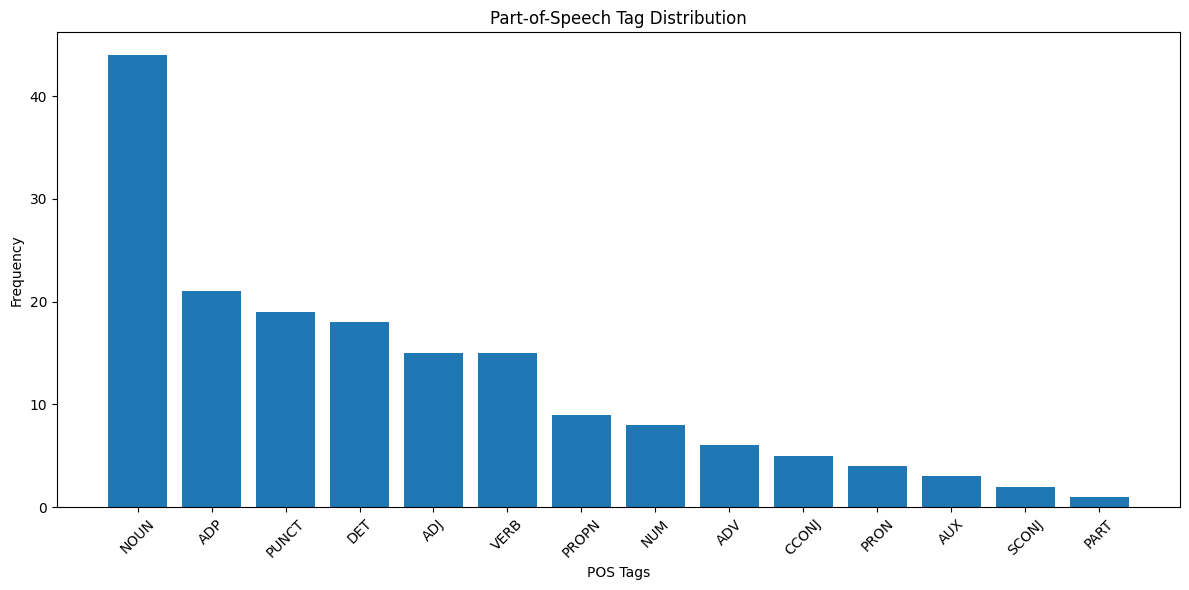

In [21]:
def pos_tagging(text, nlp_model):
    """
    Apply Part-of-Speech tagging to text.
    
    Args:
        text (str): Input text
        nlp_model: Loaded spaCy model
    
    Returns:
        list: List of tokens with POS information
    """
    doc = nlp_model(text)
    pos_tokens = []
    
    for token in doc:
        if not token.is_space:
            pos_tokens.append({
                'text': token.text,
                'pos': token.pos_,
                'tag': token.tag_,
                'pos_description': spacy.explain(token.pos_),
                'tag_description': spacy.explain(token.tag_)
            })
    
    return pos_tokens

# Apply POS tagging
pos_tokens = pos_tagging(abstract, nlp)

print("POS Tagging Results:")
print("=" * 22)
print(f"Total tokens: {len(pos_tokens)}\n")

# Show first 15 tokens with POS tags
pos_df = pd.DataFrame(pos_tokens[:15])
print("First 15 tokens with POS tags:")
print(pos_df[['text', 'pos', 'pos_description']].to_string(index=False))

# POS tag distribution
pos_counts = Counter([token['pos'] for token in pos_tokens])
print(f"\nPOS Tag Distribution:")
for pos, count in pos_counts.most_common():
    description = spacy.explain(pos) or pos
    print(f"{pos} ({description}): {count}")

# Visualize POS distribution
plt.figure(figsize=(12, 6))
pos_labels, pos_counts_values = zip(*pos_counts.most_common())
plt.bar(pos_labels, pos_counts_values)
plt.title('Part-of-Speech Tag Distribution')
plt.xlabel('POS Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. Phrase Chunking

Phrase chunking groups related tokens into meaningful phrases using dependency parsing.

In [22]:
def phrase_chunking(text, nlp_model):
    """
    Extract noun phrases and other meaningful chunks from text.
    
    Args:
        text (str): Input text
        nlp_model: Loaded spaCy model
    
    Returns:
        dict: Dictionary containing different types of phrases
    """
    doc = nlp_model(text)
    
    # Extract noun phrases
    noun_phrases = []
    for chunk in doc.noun_chunks:
        noun_phrases.append({
            'text': chunk.text,
            'root': chunk.root.text,
            'root_dep': chunk.root.dep_,
            'root_head': chunk.root.head.text
        })
    
    # Extract verb phrases (simplified - tokens with verb POS and their objects)
    verb_phrases = []
    for token in doc:
        if token.pos_ == 'VERB':
            # Get verb and its direct objects/complements
            phrase_tokens = [token.text]
            for child in token.children:
                if child.dep_ in ['dobj', 'iobj', 'attr', 'prep']:
                    phrase_tokens.append(child.text)
            
            if len(phrase_tokens) > 1:
                verb_phrases.append({
                    'text': ' '.join(phrase_tokens),
                    'root_verb': token.text,
                    'dependencies': [child.dep_ for child in token.children]
                })
    
    return {
        'noun_phrases': noun_phrases,
        'verb_phrases': verb_phrases
    }

# Apply phrase chunking
phrases = phrase_chunking(abstract, nlp)

print("Phrase Chunking Results:")
print("=" * 26)

# Display noun phrases
print(f"Found {len(phrases['noun_phrases'])} noun phrases:")
if phrases['noun_phrases']:
    np_df = pd.DataFrame(phrases['noun_phrases'])
    print(np_df[['text', 'root', 'root_dep']].to_string(index=False))

print(f"\nFound {len(phrases['verb_phrases'])} verb phrases:")
if phrases['verb_phrases']:
    vp_df = pd.DataFrame(phrases['verb_phrases'])
    print(vp_df[['text', 'root_verb']].to_string(index=False))

# Most common noun phrase roots
np_roots = [np['root'] for np in phrases['noun_phrases']]
common_np_roots = Counter(np_roots).most_common(5)

print(f"\nMost common noun phrase roots:")
for root, count in common_np_roots:
    print(f"{root}: {count}")

Phrase Chunking Results:
Found 35 noun phrases:
                                              text         root  root_dep
         The dominant sequence transduction models       models nsubjpass
complex recurrent or convolutional neural networks     networks      pobj
                                              that         that     nsubj
                                        an encoder      encoder      dobj
                                         a decoder      decoder      conj
                        The best performing models       models     nsubj
                                       the encoder      encoder      dobj
                                           decoder      decoder      conj
                            an attention mechanism    mechanism      pobj
                                                We           We     nsubj
                 a new simple network architecture architecture      dobj
                                   the Transformer  Transformer 

# 8. Syntactic Parser

Syntactic parsing analyzes the grammatical structure and dependencies between words.

In [23]:
def syntactic_parsing(text, nlp_model):
    """
    Analyze syntactic dependencies and grammatical structure.
    
    Args:
        text (str): Input text
        nlp_model: Loaded spaCy model
    
    Returns:
        tuple: (dependency_info, sentence_structures)
    """
    doc = nlp_model(text)
    
    # Extract dependency information
    dependencies = []
    for token in doc:
        if not token.is_space:
            dependencies.append({
                'text': token.text,
                'dep': token.dep_,
                'dep_description': spacy.explain(token.dep_),
                'head': token.head.text,
                'pos': token.pos_,
                'children': [child.text for child in token.children]
            })
    
    # Analyze sentence structure for each sentence
    sentence_structures = []
    for sent in doc.sents:
        # Find root of sentence
        root = [token for token in sent if token.dep_ == 'ROOT'][0]
        
        structure = {
            'sentence': sent.text.strip(),
            'root': root.text,
            'root_pos': root.pos_,
            'subjects': [token.text for token in sent if token.dep_ in ['nsubj', 'nsubjpass']],
            'objects': [token.text for token in sent if token.dep_ in ['dobj', 'iobj', 'pobj']],
            'modifiers': [token.text for token in sent if token.dep_ in ['amod', 'advmod', 'nummod']]
        }
        sentence_structures.append(structure)
    
    return dependencies, sentence_structures

# Apply syntactic parsing
dependencies, sentence_structures = syntactic_parsing(abstract, nlp)

print("Syntactic Parsing Results:")
print("=" * 28)

# Show dependency information for first 15 tokens
print("Dependency relationships (first 15 tokens):")
dep_df = pd.DataFrame(dependencies[:15])
print(dep_df[['text', 'dep', 'head', 'pos']].to_string(index=False))

# Dependency label distribution
dep_counts = Counter([dep['dep'] for dep in dependencies])
print(f"\nMost common dependency labels:")
for dep_label, count in dep_counts.most_common(10):
    description = spacy.explain(dep_label) or dep_label
    print(f"{dep_label} ({description}): {count}")

# Sentence structure analysis
print(f"\nSentence Structure Analysis:")
print("-" * 30)
for i, struct in enumerate(sentence_structures[:3], 1):
    print(f"\nSentence {i}: {struct['sentence'][:80]}...")
    print(f"Root: {struct['root']} ({struct['root_pos']})")
    print(f"Subjects: {', '.join(struct['subjects']) if struct['subjects'] else 'None'}")
    print(f"Objects: {', '.join(struct['objects']) if struct['objects'] else 'None'}")
    print(f"Modifiers: {', '.join(struct['modifiers'][:5]) if struct['modifiers'] else 'None'}")

Syntactic Parsing Results:
Dependency relationships (first 15 tokens):
         text       dep         head   pos
          The       det       models   DET
     dominant      amod       models   ADJ
     sequence  compound transduction  NOUN
 transduction  compound       models  NOUN
       models nsubjpass        based  NOUN
          are   auxpass        based   AUX
        based      ROOT        based  VERB
           on      prep        based   ADP
      complex      amod    recurrent   ADJ
    recurrent      amod     networks  NOUN
           or        cc    recurrent CCONJ
convolutional      conj    recurrent   ADJ
       neural  compound     networks   ADJ
     networks      pobj           on  NOUN
         that     nsubj      include  PRON

Most common dependency labels:
prep (prepositional modifier): 20
pobj (object of preposition): 20
punct (punctuation): 19
det (determiner): 18
compound (compound): 14
amod (adjectival modifier): 12
nsubj (nominal subject): 7
nummod (numeric

# Comprehensive Analysis Summary

Let's create a comprehensive summary of all the NLP processing results:

In [24]:
def comprehensive_analysis_summary():
    """
    Create a comprehensive summary of all NLP analysis results.
    """
    print("=" * 60)
    print("COMPREHENSIVE NLP ANALYSIS SUMMARY")
    print("=" * 60)
    
    print(f"\n1. TEXT STATISTICS:")
    print(f"   • Original text length: {len(abstract)} characters")
    print(f"   • Number of sentences: {len(sentences)}")
    print(f"   • Total tokens: {len(tokens)}")
    print(f"   • Alphabetic tokens: {sum(1 for t in tokens if t['is_alpha'])}")
    print(f"   • Stop words: {sum(1 for t in tokens if t['is_stop'])}")
    
    print(f"\n2. MORPHOLOGICAL ANALYSIS:")
    print(f"   • Stemmed tokens: {len(stemmed_tokens)}")
    print(f"   • Lemmatized tokens: {len(lemmatized_tokens)}")
    print(f"   • Tokens changed by lemmatization: {len([t for t in lemmatized_tokens if t['original'].lower() != t['lemma'].lower()])}")
    
    print(f"\n3. NAMED ENTITY RECOGNITION:")
    print(f"   • Named entities found: {len(entities)}")
    if entities:
        entity_types = Counter([ent['label'] for ent in entities])
        for ent_type, count in entity_types.items():
            print(f"   • {ent_type}: {count}")
    
    print(f"\n4. SYNTACTIC ANALYSIS:")
    print(f"   • Noun phrases: {len(phrases['noun_phrases'])}")
    print(f"   • Verb phrases: {len(phrases['verb_phrases'])}")
    print(f"   • Dependency relationships: {len(dependencies)}")
    
    print(f"\n5. PART-OF-SPEECH DISTRIBUTION:")
    pos_counts = Counter([token['pos'] for token in pos_tokens])
    for pos, count in pos_counts.most_common(5):
        pos_desc = spacy.explain(pos) or pos
        percentage = (count / len(pos_tokens)) * 100
        print(f"   • {pos} ({pos_desc}): {count} ({percentage:.1f}%)")
    
    print(f"\n6. KEY FINDINGS:")
    # Most common meaningful words (excluding stop words)
    meaningful_words = [t['lemma'].lower() for t in lemmatized_tokens 
                       if not t['is_stop'] and len(t['lemma']) > 2]
    common_words = Counter(meaningful_words).most_common(5)
    print(f"   • Most frequent meaningful words: {', '.join([w[0] for w in common_words])}")
    
    # Sentence complexity (average tokens per sentence)
    avg_tokens_per_sentence = len([t for t in tokens if t['is_alpha']]) / len(sentences)
    print(f"   • Average tokens per sentence: {avg_tokens_per_sentence:.1f}")
    
    print("\n" + "=" * 60)

# Generate comprehensive summary
comprehensive_analysis_summary()

COMPREHENSIVE NLP ANALYSIS SUMMARY

1. TEXT STATISTICS:
   • Original text length: 971 characters
   • Number of sentences: 6
   • Total tokens: 179
   • Alphabetic tokens: 144
   • Stop words: 60

2. MORPHOLOGICAL ANALYSIS:
   • Stemmed tokens: 84
   • Lemmatized tokens: 144
   • Tokens changed by lemmatization: 28

3. NAMED ENTITY RECOGNITION:
   • Named entities found: 17
   • ORG: 5
   • CARDINAL: 5
   • DATE: 3
   • LANGUAGE: 2
   • NORP: 2

4. SYNTACTIC ANALYSIS:
   • Noun phrases: 35
   • Verb phrases: 11
   • Dependency relationships: 170

5. PART-OF-SPEECH DISTRIBUTION:
   • NOUN (noun): 44 (25.9%)
   • ADP (adposition): 21 (12.4%)
   • PUNCT (punctuation): 19 (11.2%)
   • DET (determiner): 18 (10.6%)
   • ADJ (adjective): 15 (8.8%)

6. KEY FINDINGS:
   • Most frequent meaningful words: model, translation, task, bleu, base
   • Average tokens per sentence: 24.0



# Visualization of Results

Let's create some visualizations to better understand the analysis results:

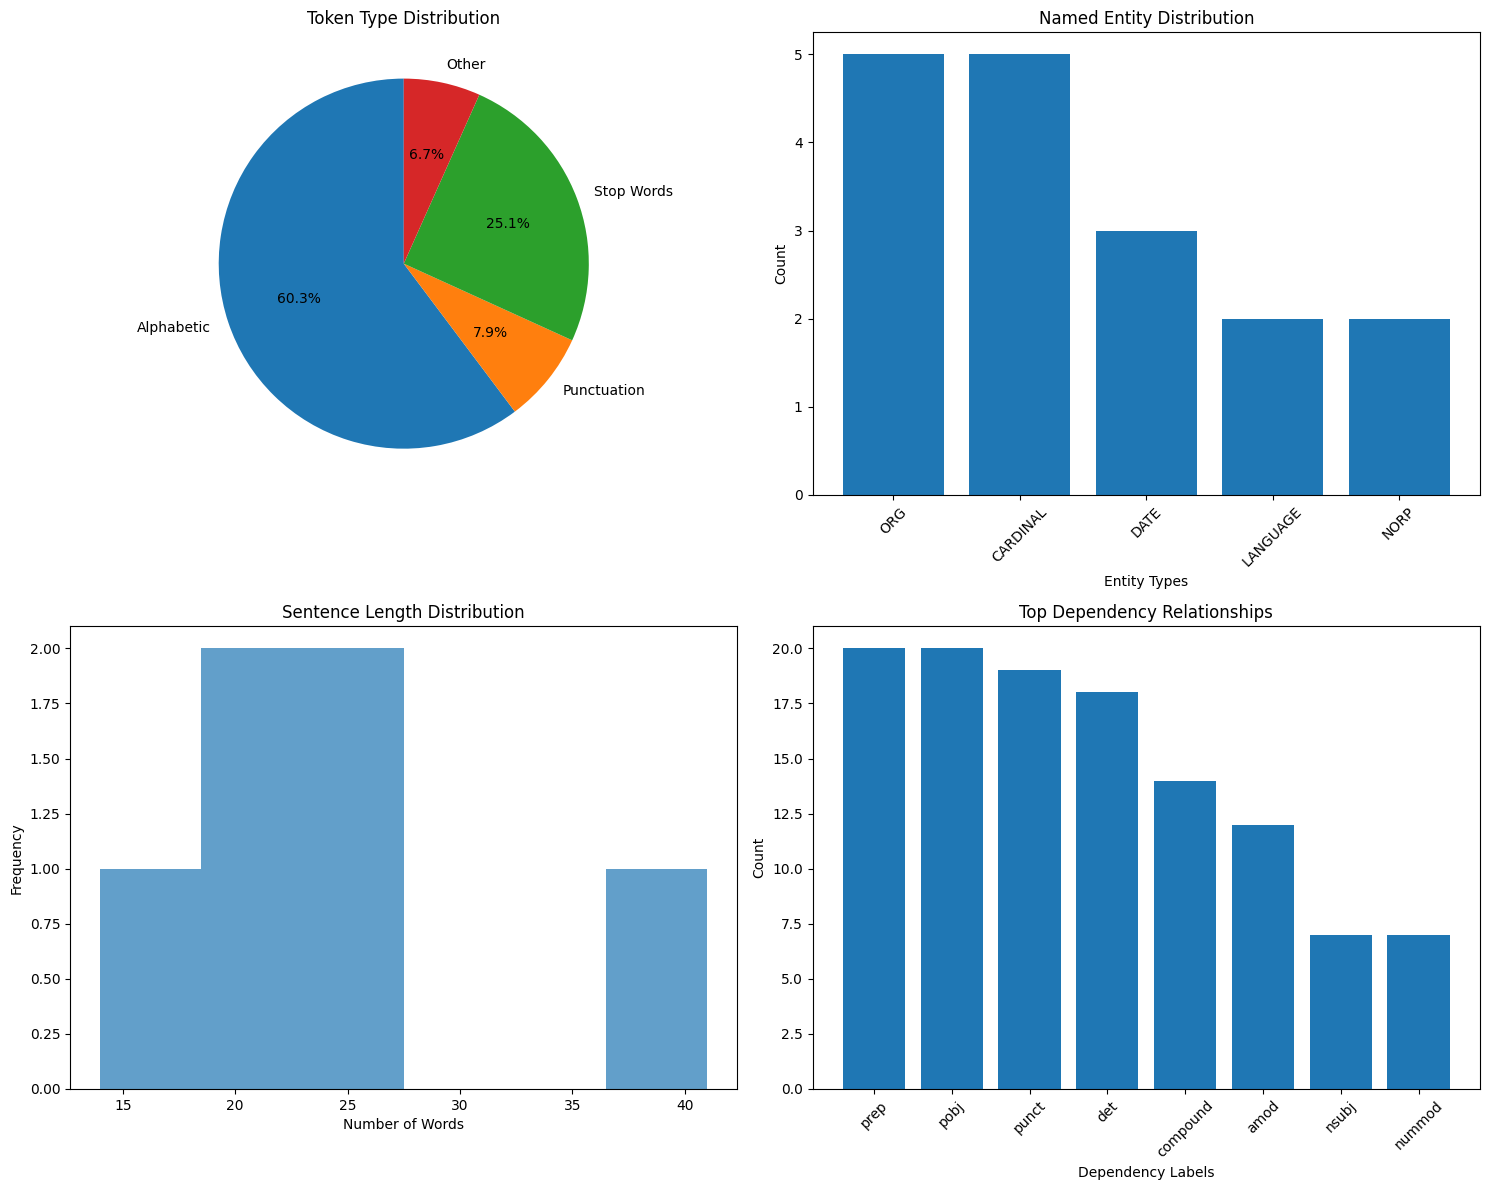

Visualizations created successfully!


In [25]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Token type distribution
token_types = ['Alphabetic', 'Punctuation', 'Stop Words', 'Other']
token_counts = [
    sum(1 for t in tokens if t['is_alpha']),
    sum(1 for t in tokens if t['is_punct']),
    sum(1 for t in tokens if t['is_stop']),
    len(tokens) - sum(1 for t in tokens if t['is_alpha'] or t['is_punct'] or t['is_stop'])
]

axes[0, 0].pie(token_counts, labels=token_types, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Token Type Distribution')

# 2. Named entity distribution
if entities:
    entity_labels = [ent['label'] for ent in entities]
    entity_counts = Counter(entity_labels)
    
    axes[0, 1].bar(entity_counts.keys(), entity_counts.values())
    axes[0, 1].set_title('Named Entity Distribution')
    axes[0, 1].set_xlabel('Entity Types')
    axes[0, 1].set_ylabel('Count')
    axes[0, 1].tick_params(axis='x', rotation=45)
else:
    axes[0, 1].text(0.5, 0.5, 'No Named Entities Found', 
                   horizontalalignment='center', verticalalignment='center',
                   transform=axes[0, 1].transAxes)
    axes[0, 1].set_title('Named Entity Distribution')

# 3. Sentence length distribution
sentence_lengths = [len(sent.split()) for sent in sentences]
axes[1, 0].hist(sentence_lengths, bins=len(set(sentence_lengths)), alpha=0.7)
axes[1, 0].set_title('Sentence Length Distribution')
axes[1, 0].set_xlabel('Number of Words')
axes[1, 0].set_ylabel('Frequency')

# 4. Top dependency relationships
dep_counts = Counter([dep['dep'] for dep in dependencies])
top_deps = dict(dep_counts.most_common(8))

axes[1, 1].bar(top_deps.keys(), top_deps.values())
axes[1, 1].set_title('Top Dependency Relationships')
axes[1, 1].set_xlabel('Dependency Labels')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("Visualizations created successfully!")